# Features & Segmentation

Lesson Overview
Welcome to this lesson on Types of Features & Image Segmentation.

In this lesson you will :

+ Implement code to distinguish features and extract information about an object’s color and shape.
+ Use features to identify areas on a face and to recognize the shape of a car or pedestrian on a road.
+ Implement k-means clustering to break an image up into parts.
+ Find the contours and edges of multiple objects in an image.
+ Learn about background subtraction for video.
Let's begin!

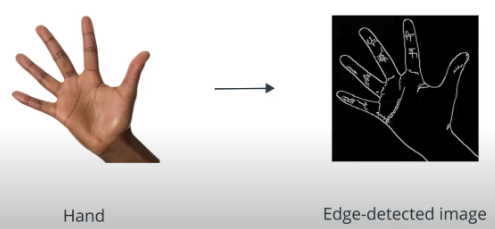

# Types of Features

1. Edges : Areas with high intensity gradient or these are the areas where intesity abruptly changes
2. Corners : Intersection of 2 edges
3. Blobs : Region based features, areas of extreme brightness or unique texture
   
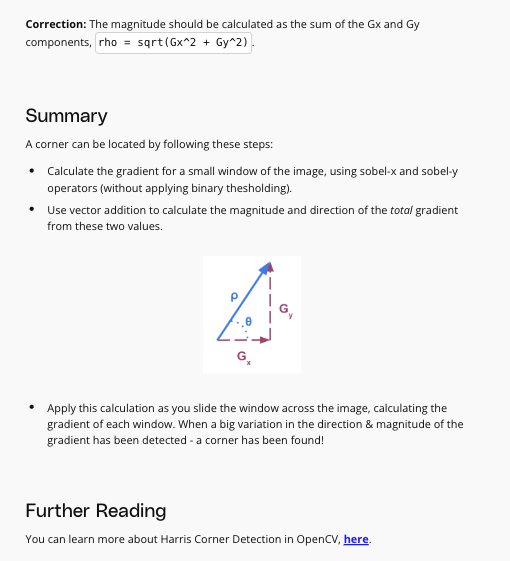



# Harris Corner Detection

### Import resources and display image

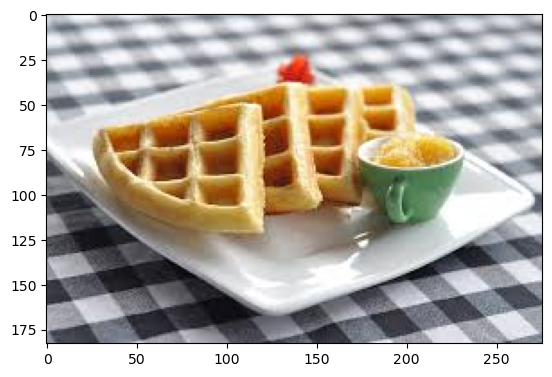

In [2]:
import matplotlib.pyplot as plt
import cv2
import numpy as np

%matplotlib inline 

#read in the image
image = cv2.imread('images/waffle.jpg')

#make copy of the image
image_copy = np.copy(image)

#Change color to RGB (from BGR)
image_copy = cv2.cvtColor(image_copy, cv2.COLOR_BGR2RGB)

plt.imshow(image_copy)

### Detect corners

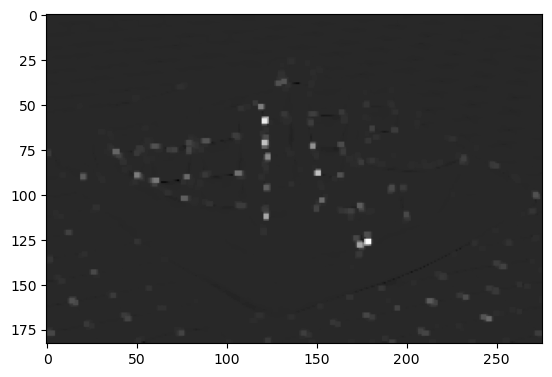

In [3]:
# Convert to grayscale
gray = cv2.cvtColor(image_copy, cv2.COLOR_RGB2GRAY)
gray = np.float32(gray)

# Detect corners 
dst = cv2.cornerHarris(gray, 2, 3, 0.04)

# Dilate corner image to enhance corner points
dst = cv2.dilate(dst,None)

plt.imshow(dst, cmap='gray')


### Extract and display strong corners

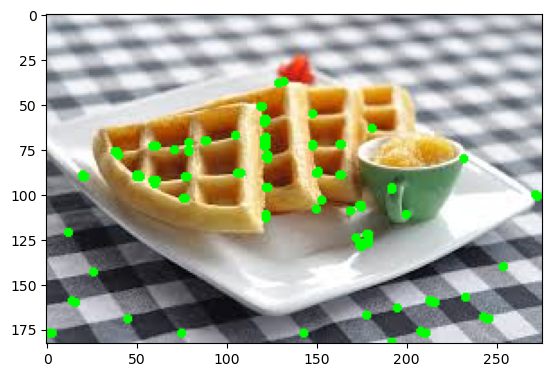

In [4]:
## TODO: Define a threshold for extracting strong corners
# This value vary depending on the image and how many corners you want to detect
# Try changing this free parameter, 0.1, to be larger or smaller ans see what happens
thresh = 0.1*dst.max()

# Create an image copy to draw corners on
corner_image = np.copy(image_copy)

# Iterate through all the corners and draw them on the image (if they pass the threshold)
for j in range(0, dst.shape[0]):
    for i in range(0, dst.shape[1]):
        if(dst[j,i] > thresh):
            # image, center pt, radius, color, thickness
            cv2.circle( corner_image, (i, j), 1, (0,255,0), 1)

plt.imshow(corner_image)

### Detect corners

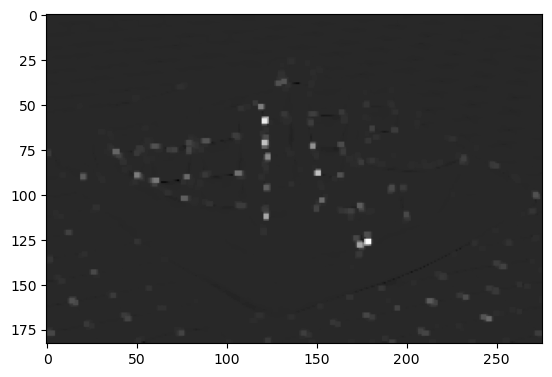

In [5]:
# Convert to grayscale
gray = cv2.cvtColor(image_copy, cv2.COLOR_RGB2GRAY)
gray = np.float32(gray)

# Detect corners 
dst = cv2.cornerHarris(gray, 2, 3, 0.04)

# Dilate corner image to enhance corner points
dst = cv2.dilate(dst,None)

plt.imshow(dst, cmap='gray')


### Extract and display strong corners

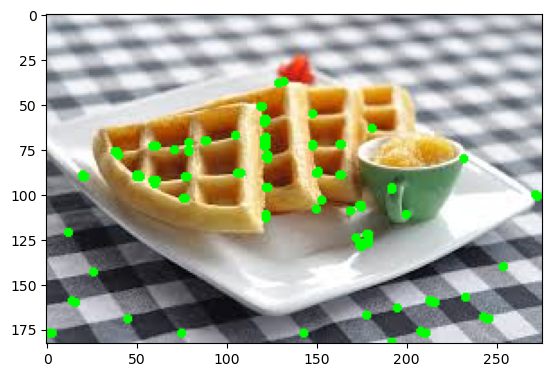

In [6]:
## TODO: Define a threshold for extracting strong corners
# This value vary depending on the image and how many corners you want to detect
# Try changing this free parameter, 0.1, to be larger or smaller ans see what happens
thresh = 0.1*dst.max()

# Create an image copy to draw corners on
corner_image = np.copy(image_copy)

# Iterate through all the corners and draw them on the image (if they pass the threshold)
for j in range(0, dst.shape[0]):
    for i in range(0, dst.shape[1]):
        if(dst[j,i] > thresh):
            # image, center pt, radius, color, thickness
            cv2.circle( corner_image, (i, j), 1, (0,255,0), 1)

plt.imshow(corner_image)

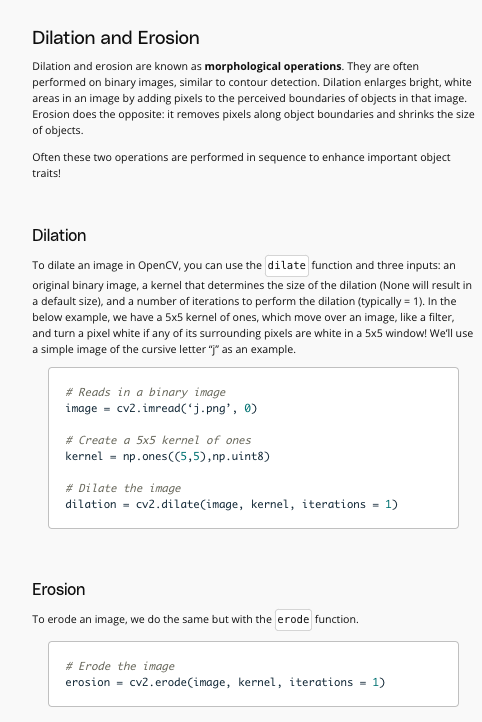 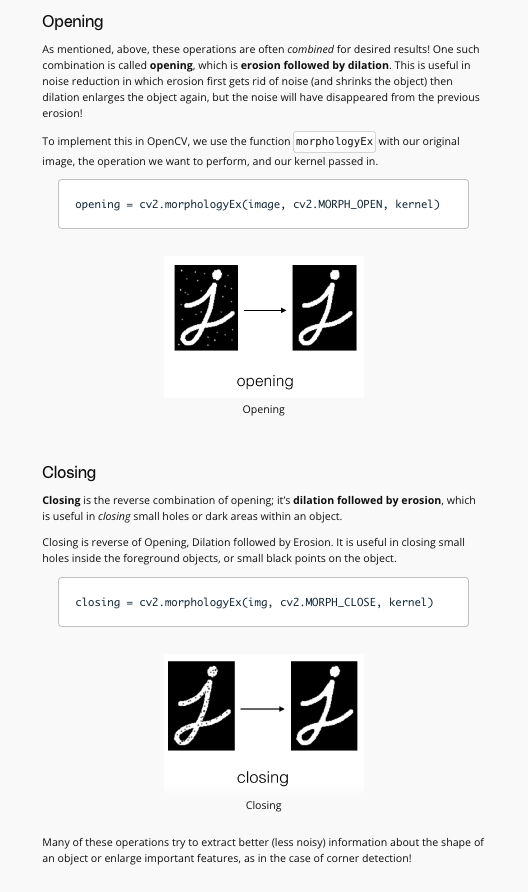

## Image Segmentation

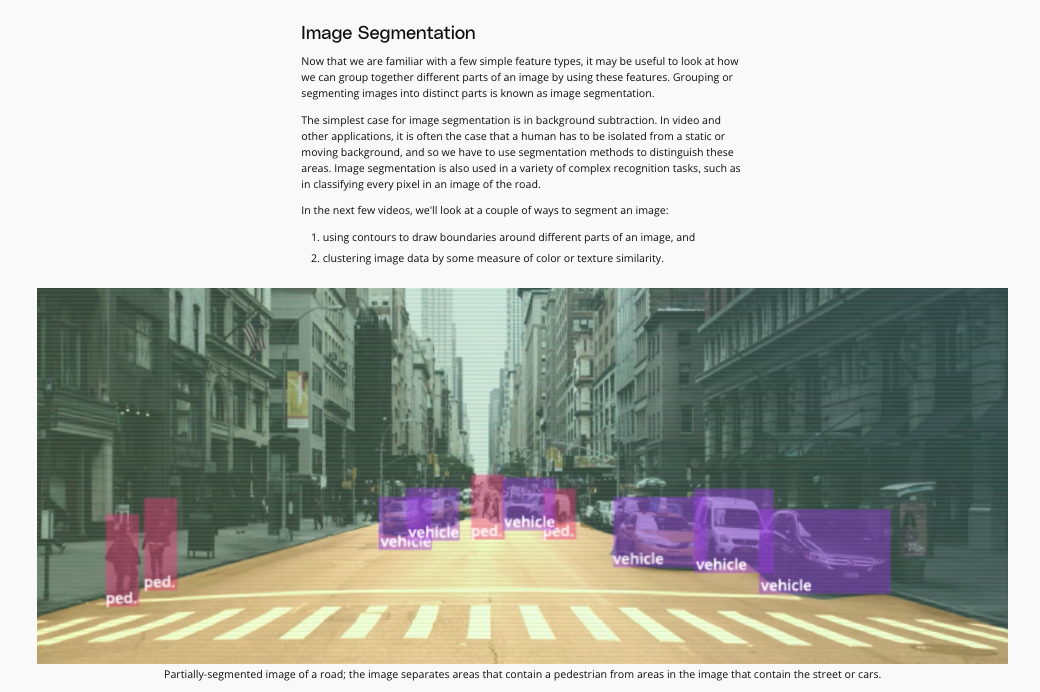

## Image Contours

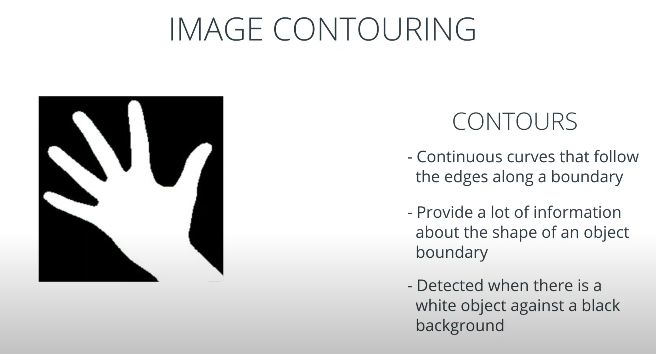 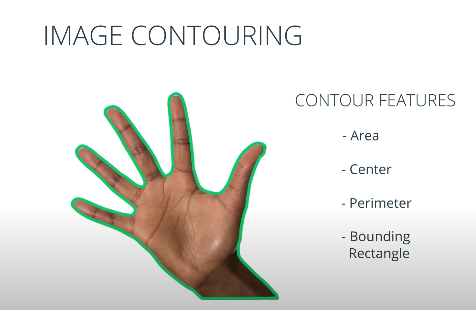

# Finding Contours

### Import resources and display image

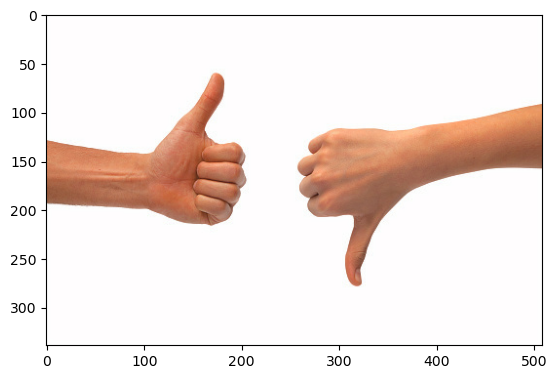

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

%matplotlib inline

#Read in the image
image = cv2.imread('images/thumbs_up_down.jpg')

#Change color to RGB from BGR
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.imshow(image)

### Produce a binary image for finding contours

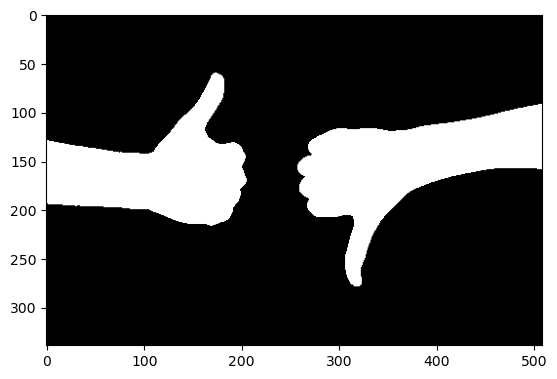

In [11]:
# Convert to grayscale
gray = cv2.cvtColor(image,cv2.COLOR_RGB2GRAY)

# Create a binary thresholded image
retval, binary = cv2.threshold(gray, 225, 255, cv2.THRESH_BINARY_INV)

plt.imshow(binary, cmap='gray')

## Contour Features

Every contour has a number of features that you can calculate, including the area of the contour, it's orientation (the direction that most of the contour is pointing in), it's perimeter, and many other properties outlined in [OpenCV documentation, here](http://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_contours/py_contour_properties/py_contour_properties.html).

In the next cell, you'll be asked to identify the orientations of both the left and right hand contours. The orientation should give you an idea of which hand has its thumb up and which one has its thumb down!

### Orientation

The orientation of an object is the angle at which an object is directed. To find the angle of a contour, you should first find an ellipse that fits the contour and then extract the `angle` from that shape.
 
```python
# Fit an ellipse to a contour and extract the angle from that ellipse
(x,y), (MA,ma), angle = cv2.fitEllipse(selected_contour)
```

**Orientation values**

These orientation values are in degrees measured from the x-axis. A value of zero means a flat line, and a value of 90 means that a contour is pointing straight up!

So, the orientation angles that you calculated for each contour should be able to tell us something about the general position of the hand. The hand with it's thumb up, should have a higher (closer to 90 degrees) orientation than the hand with it's thumb down.

### TODO: Find the orientation of each contour

In [12]:
# Find contours from thresholded, binary image
retval, contours, hierarchy = cv2.findContours(binary, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

# Draw all contours on a copy of the original image
contours_image = np.copy(image)
contours_image = cv2.drawContours(contours_image, contours, -1, (0,255,0), 3)

plt.imshow(contours_image)

ValueError: not enough values to unpack (expected 3, got 2)